In [61]:
# Библиотеки. Начальные данные

import numpy as np
import math
import scipy
import pandas as pd
import random
import seaborn as sb
import matplotlib.pyplot as plt

n = 120
hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

In [62]:
# Функции

def p(x):
    if x <= 0:
        return 0
    else:
        coef = (1 / (np.sqrt(0.4 * np.pi) * x))
        exp_coef = - (np.log(x) - 2) ** 2 / 0.4
        
        return coef * np.exp(exp_coef)

def F(x):
    if x <= 0:
        return 0
    else: 
        return 0.5 * (math.erf((np.log(x) - 2) / (np.sqrt(0.4))) +1 )
    
def obrF(y):
    if y <=0:
        return 0
    else:
        return math.exp(2 + np.sqrt(0.4) * scipy.special.erfinv(2 * y - 1))

def funToArray(array, fun):
    arr = []
    for x in array:
        arr.append(fun(x))
    return arr

def ind(x):
    if (x > 0):
        return 1
    return 0

def Femp(z):
    result = 0
    for i in X:
        result += ind(z - i)
    result /= n
    return result
    

def R(z):
    value = Femp(z) + eps 
    if value > 1:
        return 1
    else:
        return value

def L(z):
    value = Femp(z) - eps
    
    if value > 0:
        return value
    else:
        return 0
    
    return Femp(z) - eps    

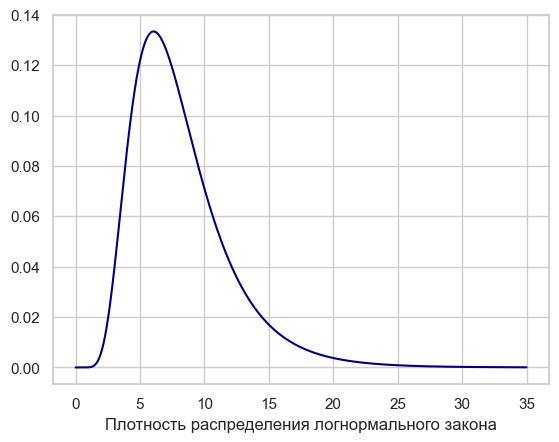

In [63]:
# График. Плотность распределения логнормального закона

x = np.arange(0, 35, 0.001)
sb.set_style("whitegrid")
plt.plot(x, funToArray(x,p), color='navy')
plt.xlabel('Плотность распределения логнормального закона')
plt.show()

In [64]:
# Смоделированный массив. Оценка выборки

Y = np.array([])
for i in range(n):
    Y = np.append(Y, random.random())
print("Моделируем массив из 120 случайных чисел:\n", Y)
print("")

print("Проходимся по смоделированному массиву и формируем новый,\nэлементами которого будут значения обратной функции распредления")

X = np.array([])
X = np.append(X, funToArray(Y,obrF))
print("\nСмоделированный массив X:")
print(X)

###

print("\n\nНаходим крайние члены вариационного ряда и размах выборки")
max = np.amax(X)
min = np.amin(X)
print("Крайние члены вариационного ряда:\nmax = ", max, "\nmin = ", min)
w = max - min
print("Размах выборки:\nw = ", w)

n = np.size(X)
l = math.trunc(1 + math.log2(n))
h = w / l
print("Размер n = ",n,"\nЧисло интервалов l = ",l,"\nШирина интервалов h = ",h)

histogram,binEdges  = np.histogram(X,l)
binEdgesAverage = np.zeros(binEdges[:l].size)
for i in range (l):
    binEdgesAverage[i] = (binEdges[i] + binEdges[i + 1]) / 2 
print("\n\nСредние значения интервалов binEdgesAverage:\n", binEdgesAverage)
print("Итнтервалы:\n", binEdges)
rf = histogram / n
print("Относительные частоты rf:\n",np.around(rf,5))
print("Частоты histogram:\n", histogram)
f1 = rf / h
print("f1\n",np.around(f1,7))

Моделируем массив из 120 случайных чисел:
 [0.33294188 0.39319674 0.57838699 0.16187704 0.05498144 0.42357149
 0.57140571 0.0087084  0.21998408 0.68979119 0.44957785 0.60006364
 0.54720498 0.74592355 0.39331865 0.01121621 0.49347372 0.11000998
 0.96215265 0.80011248 0.05706515 0.75584376 0.40279016 0.67891767
 0.2899734  0.90081829 0.61178621 0.75669934 0.84192954 0.62711821
 0.52473861 0.10490941 0.68162756 0.23638545 0.55940901 0.65222284
 0.95173874 0.28233239 0.1052696  0.16274993 0.14775196 0.24500349
 0.34573453 0.43994371 0.78228253 0.80196995 0.89185277 0.19875484
 0.93097566 0.78594503 0.52773639 0.42196104 0.62159657 0.32645589
 0.83159846 0.54152252 0.83998415 0.50783045 0.3791729  0.31743502
 0.70888462 0.18179886 0.70733558 0.0399879  0.16436271 0.27400237
 0.91541984 0.21673933 0.70449491 0.3955922  0.18468884 0.59761993
 0.15588145 0.4791457  0.72153057 0.96739067 0.84422967 0.79197265
 0.51491858 0.04511534 0.26504745 0.91182642 0.08961154 0.28510078
 0.06041372 0.63305

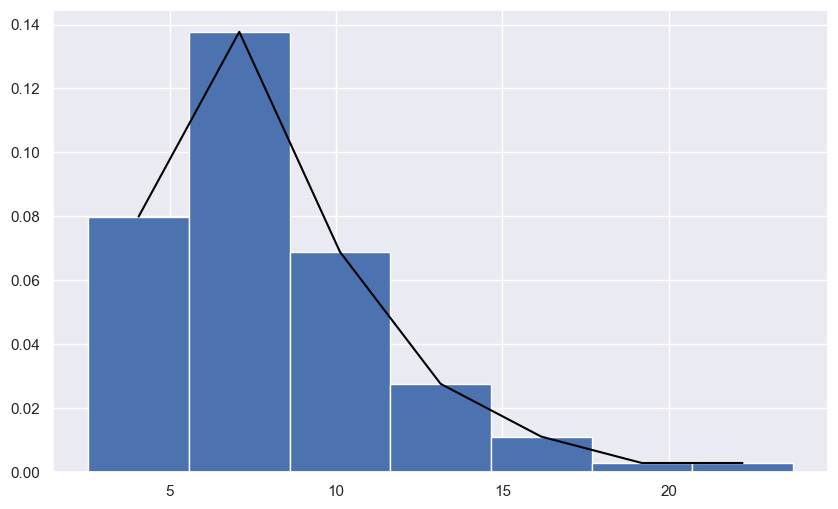

In [65]:
# График. Гистограмма распределения

sb.set_theme()
plt.figure(figsize=(10,6))
x = binEdgesAverage
y = f1
plt.bar(x, y, width=h)
plt.plot(x, y, color = 'black')
plt.show()

In [66]:
# Выборочные параметры

xm = 0
for i in range(X.shape[0]):
    xm += X[i]
xm /= n
print("\n\nВыборочное среднее xm = ", xm)

s2 = 0
for i in range(X.shape[0]):
    s2 += (X[i] - xm) ** 2
s2 /= (n - 1)
print("Выборочная дисперсия s2 = ", s2)



Выборочное среднее xm =  8.179048758631877
Выборочная дисперсия s2 =  13.264983117967237


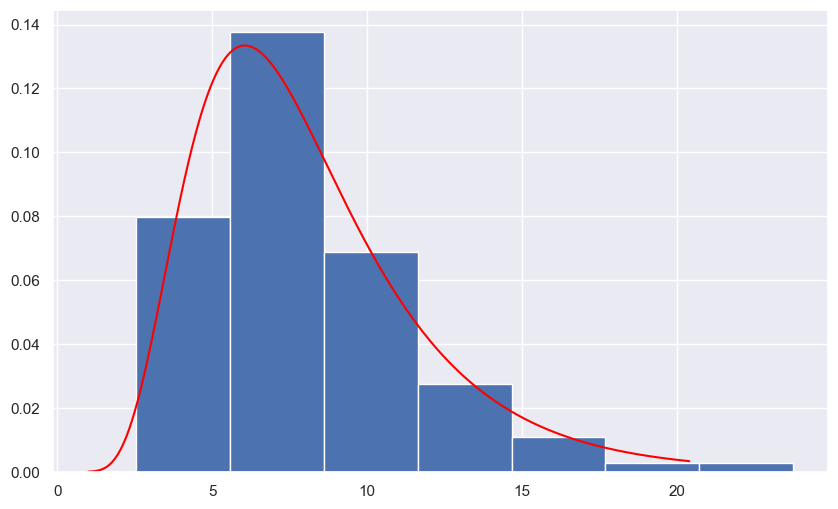

In [67]:
# График. Гистограмма с плотностью распределения

plt.figure(figsize=(10,6))
x = binEdgesAverage
y = f1
plt.bar(x, y, width=h)
x1 = np.arange(1,20.4,0.01)
y1 =  funToArray(x1,p)
plt.plot(x1, y1, color = 'red')
plt.show()


In [68]:
# Матожидание. Дисперсия

m1 = np.exp(21 / 10)
m2 = np.exp(22 / 5)
# m_1 = np.exp()
d = m2 - m1**2
print("Матожидание m1 = ",m1,"\nДисперсия d = ",d)
print("Эмпирическое среднее xm = ",xm,"\nВыборочная дисперсия s2 = ",s2)
print("Сравнение m1 - xm = ",m1 - xm,"\nd / s2 = ", d / s2, "\n")


Матожидание m1 =  8.16616991256765 
Дисперсия d =  14.764537624043001
Эмпирическое среднее xm =  8.179048758631877 
Выборочная дисперсия s2 =  13.264983117967237
Сравнение m1 - xm =  -0.01287884606422729 
d / s2 =  1.1130460923123708 



In [69]:
# График. Доверительный интервал

# sb.set_style("whitegrid")

# x = np.arange(0, 30, 0.001)
# plt.figure(figsize=(10,6))
# plt.plot(x, funToArray(x, F), color='navy')
# plt.plot(x, funToArray(x, Femp), color='red')
# plt.plot(x, funToArray(x, R), color='green')
# plt.plot(x, funToArray(x, L), color='black')
# plt.xlabel("z")
# plt.ylabel("Синий:F(z)\nКрасный:Femp(z)\nЗеленый:R(z)\nЧерный:L(z)\n")
# plt.show()

In [70]:
# Оценка параметров а и сигма^2 по методу моментов


s3 = 0
for i in range(X.shape[0]):
    s3 += (X[i]) ** 2
s3 /= (n - 1)
print("Выборочная дисперсия без выборочного среднего s3 = ", s3)

a = (4 * math.log(xm) - math.log(s3)) / 2
print("\nОценка параметра a = ", a)

sigma = math.log(s3) - 2 * math.log(xm)
print("Оценка параметра sigma^2 = ", sigma) 


print("Заданный параметр a = 2")
par_sigma = 0.2
print("Заданный параметр sigma^2 = ", par_sigma)


Выборочная дисперсия без выборочного среднего s3 =  80.723980021575

Оценка параметра a =  2.00763386968313
Оценка параметра sigma^2 =  0.18788397098732723
Заданный параметр a = 2
Заданный параметр sigma^2 =  0.2
